# Iris 3: Iris-Dataset - Clusterung mit k-Means

Wir wollen nun einen Klassifizierer für Iris-Blüten mit Hilfe des k-Means-Algorithmus erstellen. 

### Das Modell
Wir wissen, dass es drei verschiedene Iris-Blüten gibt. Wir vermuten nun, dass sich diese durch Gestalt der Bütenblätter unterscheiden lassen. Nicht nur das: Die Blüten bilden in unserem __Modell__ drei Cluster, die sich um einen zentralen Punkt bilden. Wir versuchen nun, diese Cluster bzw. diese Mittelpunkte zu bestimmen. Die Mittelpunkte stellen eine Art _ideale_ Iris-Blüte dar, also den Prototyp der jeweiligen Iris-Art, von denen die realen Iris-Blüten nur jede für sich etwas abweichen.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

import ki_kurs.kmeans as km

%matplotlib inline

### En Klasse für den Iris-Datensatz
Wir laden den Iris-Datensatz, der aus jeweils drei Sätzen an Daten zu je 50 Datensätzen besteht. Dann wenden wir unseren Algorithmus auf den kompletten Datensatz an. Dazu bauen wir eine kleine Klasse, die die Daten verwaltet.

In [5]:
mapping = {'Iris-setosa' : 0, 'Iris-versicolor' : 1, 'Iris-virginica' : 2 } 
inv_mapping = {v: k for k, v in mapping.items()}

cmap = {'Iris-setosa' : 'r', 'Iris-versicolor' : 'g', 'Iris-virginica' : 'b' } 

class IrisDataSet:    
    """ Wrapper-Klasse für den Iris-Datensatz. """
    def __init__(self,csv_file):  
        ''' Liest das Iris Dataset ein. '''    
        with open(csv_file, 'r') as file: 
            lines = file.read().splitlines()      
        self._rohdaten = np.array([line.split(',') for line in lines[1:]])
        werte,names = self._rohdaten[:,:-1].astype(float),self._rohdaten[:,-1]

        # Bestimme Minimal- und Maximalwerte und erzeuge einen Skalierer
        alle_werte = werte.flatten()
        min, max = alle_werte.min(), alle_werte.max()
        self.scale = lambda x : x / (max - min)
        self._struktdaten = list(map(list, (zip(self.scale(werte),[mapping[n] for n in names]))))

    def __len__(self):
        return len(self._rohdaten)
    
    def __getitem__(self,index):
        """ Liefert den Eintrag mit dem angegebenen Index. """        
        return self._rohdaten[index]
    
    def values(self):
        return self._rohdaten[:,:-1].astype(float),self._rohdaten[:,-1]
    
    def daten(self):
        return self._rohdaten[:,:-1].astype(float)
        
    def tt_daten(self,anzahl_training):
        ''' Bereitet das DataSet vor und teilt es in Training- und Testdaten auf '''
        np.random.shuffle(self._struktdaten)           # Gut mischen
        return self._struktdaten[:anzahl_training],self._struktdaten[anzahl_training:]


Das Einladen geht nun einfach so:

In [10]:
iris = IrisDataSet("daten/iris.csv")

### Berechnung der drei Cluster mit Hilfe von k-means

In [11]:
werte = iris.daten()
k = 3   # Anzahl der Cluster 
ms = km.init(werte,k)  # Zufaellige Startwerte 
cs,ms = km.kmeans(werte,ms)

km.print_clusters(cs,ms)

Cluster 0 (62 Punkte): Mittelpunkt [5.9016129  2.7483871  4.39354839 1.43387097]
Cluster 1 (50 Punkte): Mittelpunkt [5.006 3.418 1.464 0.244]
Cluster 2 (38 Punkte): Mittelpunkt [6.85       3.07368421 5.74210526 2.07105263]


### Visualisierung mit matplotlib

Wir zeichnen wieder die Daten der Iris-Blätter auf und färben sie nach Iris-Sorte ein. Zusätzlich tragen wir die Cluster-Mittelpunkte ein.

In [5]:
def iris_plot (iris,ms,ax1,ax2):
    x,y = iris.values()
    
    mapping = {'Iris-setosa':1,'Iris-virginica':2,'Iris-versicolor':3}
    mapping_rev = {k:v for v,k in mapping.items()}
    y_val = [mapping[y] for y in y]
    plt.scatter(x[:, ax1], x[:, ax2], s=100, marker='o',c=y_val)
    plt.scatter(ms[:,ax1],ms[:,ax2], marker='+',c='r')


NameError: name 'iris_plot' is not defined

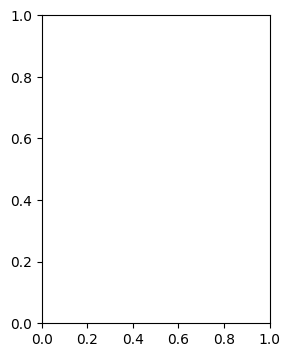

In [14]:
plt.figure(figsize=(10, 4))
comb = [[1,2],[1,3],[1,4]]
for i,c in enumerate(comb):
    plt.subplot(1,3,i+1)
    iris_plot(iris,ms,c[0],c[1])

plt.show()
